In [1]:
import json
import sys
sys.path.append('..')

from src.evaluation.metrics import DebateEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Imports successful!")

✅ Imports successful!


In [2]:
# Cell 2: Load Results (FIXED VERSION)
import os
from pathlib import Path

# Change to project root directory
project_root = Path('..').resolve()
os.chdir(project_root)

evaluator = DebateEvaluator()
results = evaluator.load_results()

print(f"Loaded {len(results)} debate results")

if len(results) == 0:
    print("\n⚠️ WARNING: No results found!")
    print("Make sure you've run: python main.py --all")
    print("Results should be in: data/results/problem_*.json")

Loaded 25 debate results


In [3]:
metrics = evaluator.calculate_metrics(results)

if metrics['total_problems'] > 0:
    print("System Performance Metrics:")
    print(f"- Total Problems: {metrics['total_problems']}")
    print(f"- Correct Answers: {metrics['correct_answers']}")
    print(f"- Accuracy: {metrics['accuracy']*100:.2f}%")
else:
    print("No metrics to calculate - no results loaded")

System Performance Metrics:
- Total Problems: 25
- Correct Answers: 13
- Accuracy: 52.00%


✅ Saved: overall_performance.png


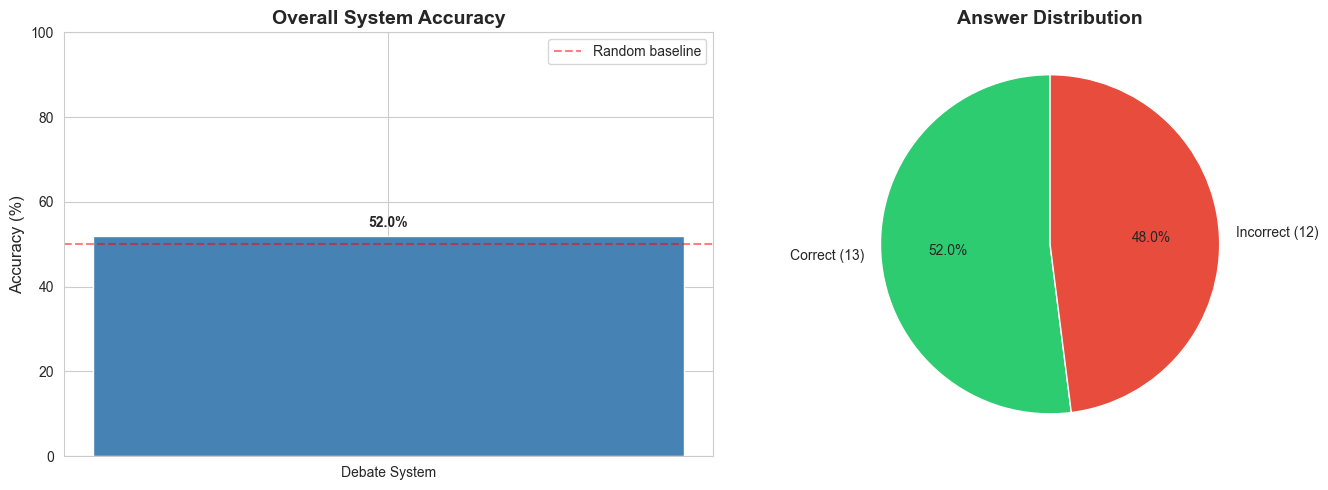

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy bar
if metrics['total_problems'] > 0:
    axes[0].bar(['Debate System'], [metrics['accuracy']*100], color='steelblue', width=0.5)
    axes[0].set_ylabel('Accuracy (%)', fontsize=12)
    axes[0].set_title('Overall System Accuracy', fontsize=14, fontweight='bold')
    axes[0].set_ylim(0, 100)
    axes[0].axhline(y=50, color='r', linestyle='--', alpha=0.5, label='Random baseline')
    axes[0].legend()
    
    # Add percentage text on bar
    for i, v in enumerate([metrics['accuracy']*100]):
        axes[0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')
else:
    axes[0].text(0.5, 0.5, 'No data available', ha='center', va='center', 
                transform=axes[0].transAxes, fontsize=14)
    axes[0].set_title('Overall System Accuracy', fontsize=14, fontweight='bold')

# Success/Failure pie
correct = metrics['correct_answers']
incorrect = metrics['total_problems'] - correct

if metrics['total_problems'] == 0:
    axes[1].text(0.5, 0.5, "No data available", ha='center', va='center',
                transform=axes[1].transAxes, fontsize=14)
    axes[1].set_title('Answer Distribution', fontsize=14, fontweight='bold')
    axes[1].axis('off')
else:
    axes[1].pie([correct, incorrect], 
                labels=[f'Correct ({correct})', f'Incorrect ({incorrect})'],
                autopct='%1.1f%%', 
                colors=['#2ecc71', '#e74c3c'],
                startangle=90)
    axes[1].set_title('Answer Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/results/overall_performance.png', dpi=300, bbox_inches='tight')
print("✅ Saved: overall_performance.png")
plt.show()

In [5]:
if len(results) > 0:
    problem_df = pd.DataFrame([
        {
            'id': r['problem']['id'],
            'category': r['problem']['category'],
            'difficulty': r['problem'].get('difficulty', 'unknown'),
            'correct': evaluator.check_correctness(r, r['problem']),
            'question': r['problem']['question'][:50] + '...'
        }
        for r in results
    ])
    
    print("\n📋 Problem-by-Problem Analysis:")
    print(problem_df[['id', 'category', 'difficulty', 'correct']])
    
    # Show some examples
    print("\n✅ Correct answers:")
    for _, row in problem_df[problem_df['correct']].head(3).iterrows():
        print(f"  Problem {row['id']}: {row['question']}")
    
    print("\n❌ Incorrect answers:")
    for _, row in problem_df[~problem_df['correct']].head(3).iterrows():
        print(f"  Problem {row['id']}: {row['question']}")
else:
    print("No results to analyze")


📋 Problem-by-Problem Analysis:
    id                        category difficulty  correct
0    0  Mathematical/Logical Reasoning       hard     True
1    1  Physics & Scientific Reasoning       hard    False
2    2                   Logic Puzzles     medium    False
3    3           Strategic Game Theory       hard    False
4    4  Mathematical/Logical Reasoning     medium    False
5    5                   Logic Puzzles       hard    False
6    6  Mathematical/Logical Reasoning       hard     True
7    7  Physics & Scientific Reasoning       hard     True
8    8  Mathematical/Logical Reasoning     medium     True
9    9                   Logic Puzzles       hard     True
10  10           Strategic Game Theory     medium    False
11  11  Physics & Scientific Reasoning       hard     True
12  12  Mathematical/Logical Reasoning       hard     True
13  13                   Logic Puzzles     medium    False
14  14  Mathematical/Logical Reasoning       hard     True
15  15  Physics & Scient


📊 Performance by Category:
                                Correct  Total   Accuracy
category                                                 
Logic Puzzles                         1      6  16.666667
Mathematical/Logical Reasoning        8      9  88.888889
Physics & Scientific Reasoning        3      6  50.000000
Strategic Game Theory                 1      4  25.000000
✅ Saved: category_performance.png


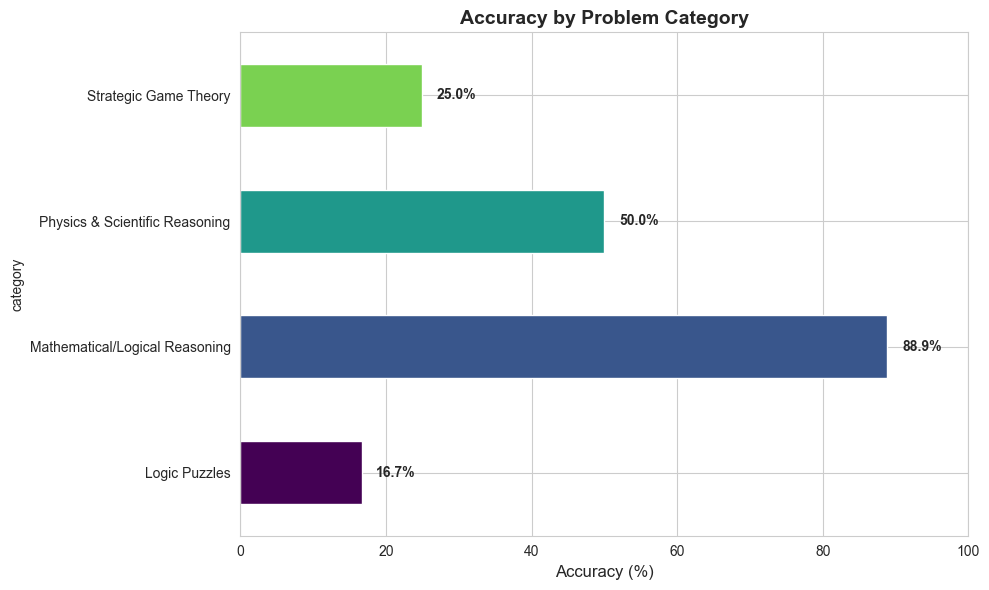

In [6]:
if len(results) > 0:
    category_stats = problem_df.groupby('category')['correct'].agg(['sum', 'count', 'mean'])
    category_stats.columns = ['Correct', 'Total', 'Accuracy']
    category_stats['Accuracy'] = category_stats['Accuracy'] * 100
    
    print("\n📊 Performance by Category:")
    print(category_stats)
    
    # Plot category performance
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(category_stats)))
    category_stats['Accuracy'].plot(kind='barh', color=colors)
    plt.xlabel('Accuracy (%)', fontsize=12)
    plt.title('Accuracy by Problem Category', fontsize=14, fontweight='bold')
    plt.xlim(0, 100)
    
    # Add percentage labels
    for i, v in enumerate(category_stats['Accuracy']):
        plt.text(v + 2, i, f'{v:.1f}%', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../data/results/category_performance.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: category_performance.png")
    plt.show()

✅ Saved: data\results\judge_decisions.png


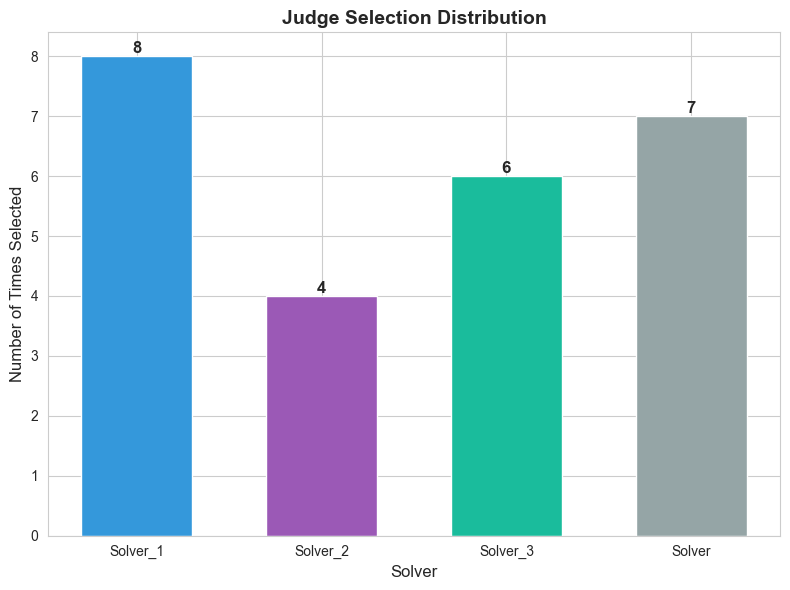


🏆 Judge Decisions:
  Solver_1: 8 times selected (32.0%)
  Solver: 7 times selected (28.0%)
  Solver_3: 6 times selected (24.0%)
  Solver_2: 4 times selected (16.0%)

Total decisions parsed: 25/25


In [7]:
# Cell 7: Analyze Judge Decisions (FIXED - Multi-Strategy Parsing)
if len(results) > 0:
    judge_decisions = []
    for r in results:
        judgment = r.get('judgment', '')
        
        # Try multiple parsing strategies
        winner = None
        
        # Strategy 1: Look for "WINNER: Solver_X" on same line
        for line in judgment.split('\n'):
            if 'WINNER:' in line and len(line.split(':')) > 1:
                winner_text = line.split(':', 1)[1].strip()
                if winner_text and 'Solver' in winner_text:
                    words = winner_text.split()
                    for word in words:
                        if word.startswith('Solver'):
                            winner = word.rstrip('.,;:')
                            break
                    if winner:
                        break
        
        # Strategy 2: Look for "WINNER:" then next non-empty line
        if not winner:
            lines = judgment.split('\n')
            for i, line in enumerate(lines):
                if 'WINNER:' in line:
                    # Check next few lines for Solver_X
                    for j in range(i+1, min(i+4, len(lines))):
                        next_line = lines[j].strip()
                        if next_line and 'Solver' in next_line:
                            words = next_line.split()
                            for word in words:
                                if word.startswith('Solver'):
                                    winner = word.rstrip('.,;:')
                                    break
                            if winner:
                                break
                    if winner:
                        break
        
        # Strategy 3: Search anywhere for Solver_X
        if not winner:
            if 'best' in judgment.lower() or 'winner' in judgment.lower():
                for word in judgment.split():
                    if word.startswith('Solver'):
                        winner = word.rstrip('.,;:\'")')
                        break
        
        if winner:
            judge_decisions.append(winner)
    
    if judge_decisions:
        from collections import Counter
        winner_counts = Counter(judge_decisions)
        
        plt.figure(figsize=(8, 6))
        solvers = list(winner_counts.keys())
        counts = list(winner_counts.values())
        
        # Color mapping
        color_map = {'Solver_1': '#3498db', 'Solver_2': '#9b59b6', 'Solver_3': '#1abc9c'}
        colors = [color_map.get(s, '#95a5a6') for s in solvers]
        
        bars = plt.bar(solvers, counts, color=colors, width=0.6)
        plt.ylabel('Number of Times Selected', fontsize=12)
        plt.title('Judge Selection Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Solver', fontsize=12)
        
        # Add count labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontweight='bold', fontsize=12)
        
        plt.tight_layout()
        
        # Handle path issues
        import os
        from pathlib import Path
        if os.path.basename(os.getcwd()) == 'notebooks':
            save_path = Path('../data/results/judge_decisions.png')
        else:
            save_path = Path('data/results/judge_decisions.png')
        
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {save_path}")
        plt.show()
        
        print("\n🏆 Judge Decisions:")
        for solver, count in winner_counts.most_common():
            pct = count / len(judge_decisions) * 100
            print(f"  {solver}: {count} times selected ({pct:.1f}%)")
        
        print(f"\nTotal decisions parsed: {len(judge_decisions)}/{len(results)}")
    else:
        print("⚠️ No judge decisions found in results")
else:
    print("No results to analyze")

In [8]:
if len(results) > 0:
    evaluator.generate_report('../data/results/evaluation_report.txt')
    print("\n✅ Evaluation report saved!")
    print("\n📁 All outputs saved to: data/results/")
    print("  - overall_performance.png")
    print("  - category_performance.png") 
    print("  - judge_decisions.png")
    print("  - evaluation_report.txt")
else:
    print("\n⚠️ No results to report on")

print("\n" + "="*60)
print("✅ Analysis complete!")
print("="*60)


       MULTI-LLM DEBATE SYSTEM EVALUATION REPORT

OVERALL PERFORMANCE:
-------------------
Total Problems:      25
Correct Answers:     13
Accuracy:            52.00%

SYSTEM METRICS:
--------------
Improvement Rate:    0 problems improved
Consensus Rate:      0 problems with full agreement

COMPARISON TO BASELINES:
-----------------------
(To be filled after running baseline experiments)
- Single LLM:        TBD
- Simple Voting:     TBD  
- Debate System:     52.00%



✅ Evaluation report saved!

📁 All outputs saved to: data/results/
  - overall_performance.png
  - category_performance.png
  - judge_decisions.png
  - evaluation_report.txt

✅ Analysis complete!
